***STEP 1: Importing Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***STEP 2: Uploding Dataset***

In [ ]:
df=pd.read_csv('/content/sample_data/Electric Vehicle Sales by State in India.csv')


***STEP 3: Dataset Overview***


In [ ]:
df.shape

(96845, 8)

In [ ]:
df.columns.nunique()

8

In [ ]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [ ]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0


In [ ]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023,dec,12-01-2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1
96841,2023,dec,12-01-2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5
96842,2023,dec,12-01-2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0
96843,2023,dec,12-01-2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0
96844,2023,dec,12-01-2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0


In [ ]:
df.Year.value_counts()

,count
Year,
2019,10315
2023,10279
2018,10225
2022,10021
2017,9799
2016,9348
2021,9249
2015,9052
2014,9022


In [ ]:
df.State.value_counts()

,count
State,
Maharashtra,4912
Karnataka,4830
Uttar Pradesh,4557
Rajasthan,4552
Gujarat,4517
West Bengal,4196
Tamil Nadu,4063
Odisha,4027
Haryana,3842


In [ ]:
df.Vehicle_Class.value_counts()

,count
Vehicle_Class,
MOTOR CAR,4111
M-CYCLE/SCOOTER,4101
GOODS CARRIER,4096
MOTOR CAB,3985
BUS,3813
...,...
SEMI-TRAILER (COMMERCIAL),18
X-RAY VAN,12
MOTOR CYCLE/SCOOTER-WITH TRAILER,9


In [ ]:
df.Vehicle_Category.value_counts()

,count
Vehicle_Category,
Others,54423
2-Wheelers,13121
3-Wheelers,11491
Bus,9119
4-Wheelers,8691


In [ ]:
df.Vehicle_Type.value_counts()

,count
Vehicle_Type,
Others,54423
2W_Personal,11700
Bus,7026
4W_Shared,4580
4W_Personal,4111
3W_Shared,3786
3W_Goods,3208
Institution Bus,2093
3W_Shared_LowSpeed,1951


In [ ]:
df.drop(columns=['Year']).describe()

,EV_Sales_Quantity
count,96845.000000
mean,37.108896
std,431.566675
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20584.000000


***STEP 4: Checking for Duplicates and Missing Values***

In [ ]:
check_duplicates=df.duplicated().sum()
print(check_duplicates)


0


In [ ]:
check_missing_values=df.isnull().sum()
print(check_missing_values)

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


***STEP 5: Converting Column To Their Relevant Datatypes***

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['EV_Sales_Quantity'] = pd.to_numeric(df['EV_Sales_Quantity'], errors='coerce')
df.dropna(subset=['Date', 'EV_Sales_Quantity'], inplace=True)


In [ ]:
categorical_columns = ['Month_Name', 'State', 'Vehicle_Class','Vehicle_Category', 'Vehicle_Type']
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  int64         
dtypes: category(5), datetime64[ns](1), int64(2)
memory usage: 2.7 MB


In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  int64         
 8   Month              96845 non-null  int32         
dtypes: category(5), datetime64[ns](1), int32(2), int64(1)
memory usage: 2.7 MB


***STEP 6: EDA***

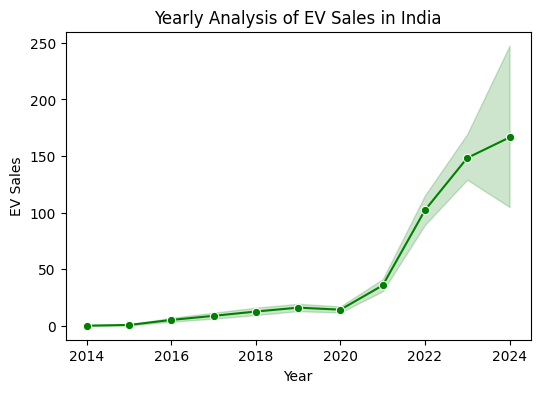

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, marker='o', color='g')
plt.xlabel('Year')
plt.ylabel('EV Sales');

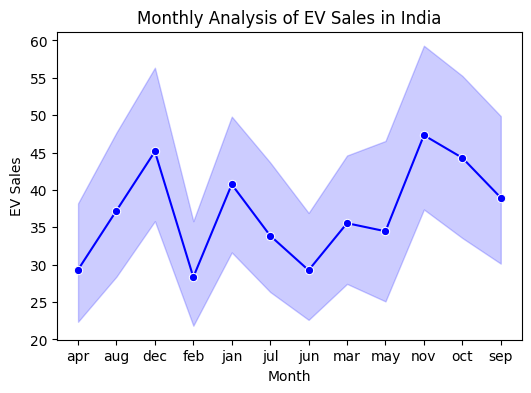

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Monthly Analysis of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('EV Sales');


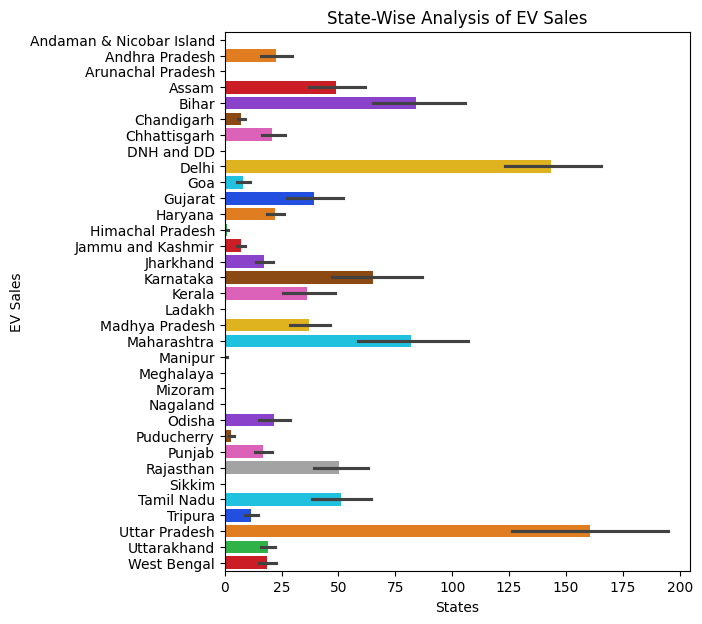

In [ ]:
plt.figure(figsize=(6,7))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=df, hue='State', palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales');

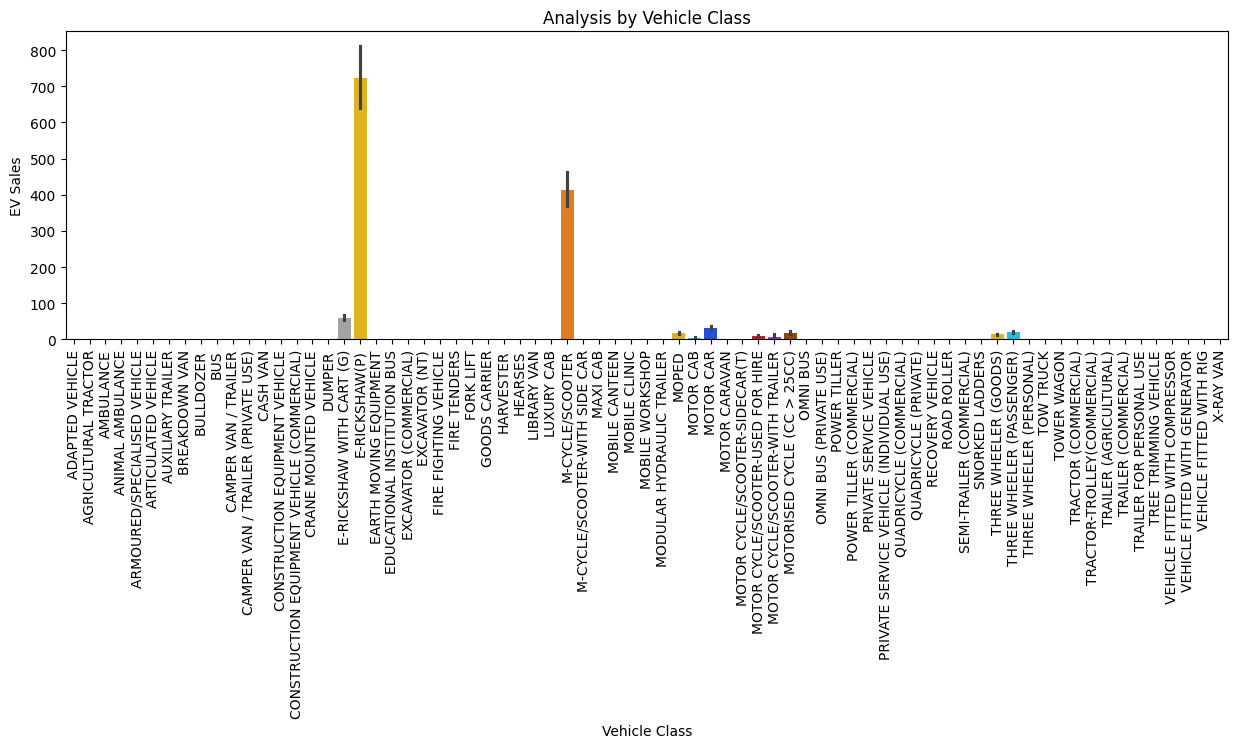

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity',data=df, hue='Vehicle_Class', palette='bright')
plt.title('Analysis by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);


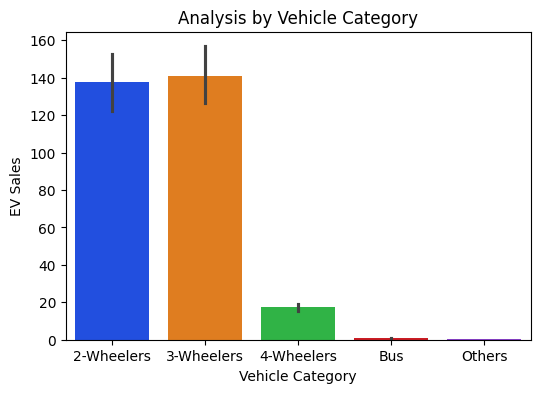

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Category',
y='EV_Sales_Quantity',data=df, hue='Vehicle_Category',
palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=0);


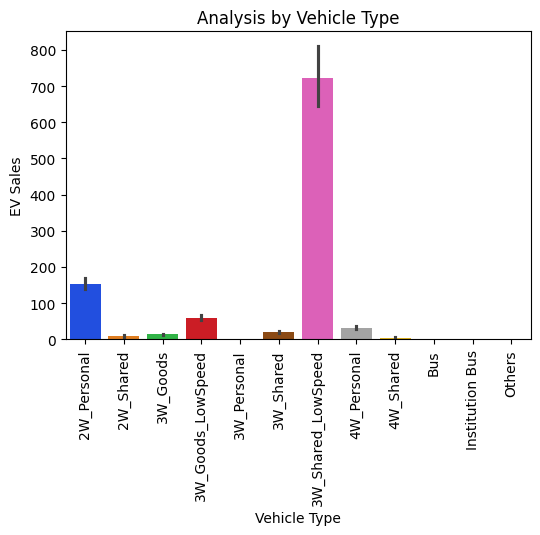

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=df,
hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);

/tmp/ipython-input-3471496774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)


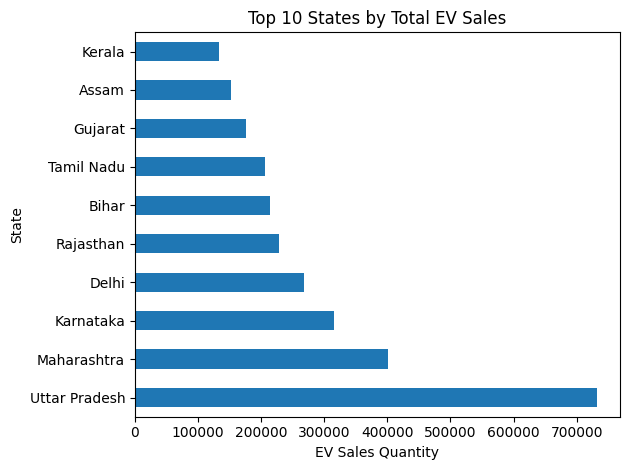

In [ ]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='barh', title='Top 10 States by Total EV Sales')
plt.xlabel('EV Sales Quantity')
plt.tight_layout()
plt.show()

**STEP 7: Prediction Model (Random Forest)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Simple feature selection
features = ['Year','Month']
X = df[features]
y = df['EV_Sales_Quantity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 507.18


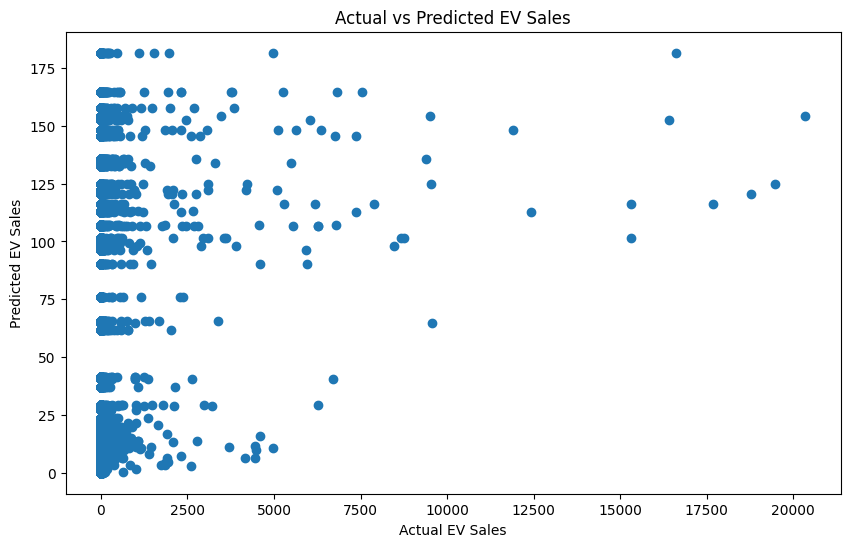

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()

In [ ]:
importance = model.feature_importances_
feature_importance = pd.Series(importance,
index=X_train.columns).sort_values(ascending=False)

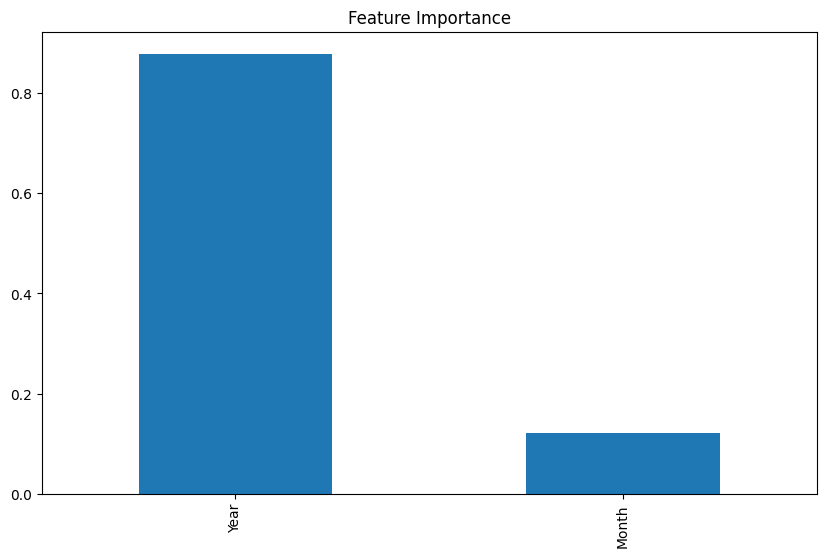

In [ ]:
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()